In [1]:
import tclab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gekko import GEKKO

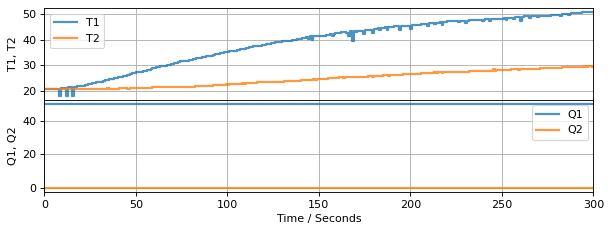

TCLab disconnected successfully.


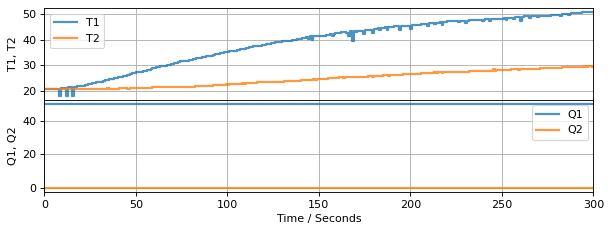

In [2]:
t_heat = 300 # seconds

with tclab.TCLab() as lab:
    h = tclab.Historian(lab.sources)
    p = tclab.Plotter(h, twindow=t_heat, layout=(('T1', 'T2'), ('Q1', 'Q2')))
    for t in tclab.clock(t_heat):
        lab.Q1(50)
        p.update(t)

In [3]:
df = pd.DataFrame(p.historian.log, columns=p.historian.columns)

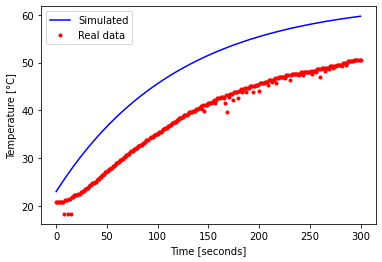

In [10]:
secs, resolution = 300, 10
m = GEKKO()
m.time = np.linspace(0, secs, secs * resolution + 1)

# Heater percentage points
Q_step = 50 * np.ones(secs * resolution + 1)
Q = m.Param(value=Q_step)  

# Tau * dT/dt = (Ta - T) + Kp * Q
Tau = 120 # seconds
Kp = 0.8  # degrees / percentage point
Ta = 23   # Initial temperature, degrees 

T = m.Var(23)
m.Equation(Tau * T.dt() == (Ta - T) + Kp * Q)

m.options.IMODE = 4 # dynamic simulation
m.solve(disp=False)

# Simulated results
plt.plot(m.time, T, 'b-', label=r'Simulated')
plt.plot(df.Time, df.T1, 'r.', label=r'Real data')
# plt.plot(m.time, Q, 'k-', linewidth=2, label=r'Q(t)')
plt.xlabel('Time [seconds]')
plt.ylabel('Temperature [°C]')
plt.legend()
plt.show()